In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets("MNIST_data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [9]:
mnist.validation.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
mnist.train.num_examples

55000

In [11]:
mnist.test.num_examples

10000

In [13]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
mnist.validation.num_examples

5000

In [17]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

##Visualizing the Data

In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [18]:
mnist.train.images.shape

(55000, 784)

In [19]:
mnist.train.images[500]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
my_img=mnist.train.images[500].reshape(28,28)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

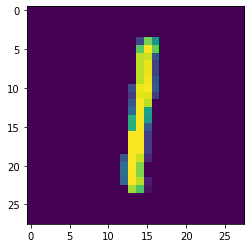

In [22]:
plt.imshow(my_img)

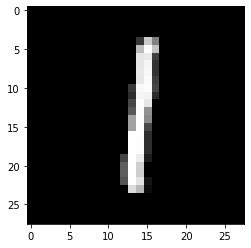

In [23]:
plt.imshow(my_img, cmap='gist_gray')

In [24]:
my_img.min()

0.0

In [25]:
my_img.max()

1.0

In [0]:
#my_img2= mnist.train.images[501].reshape(28,28)
my_img2= mnist.train.images[501].reshape(784,1)

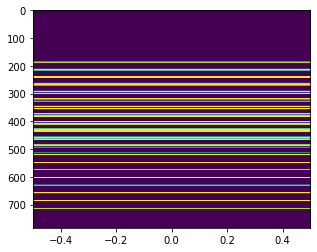

In [35]:
plt.imshow(my_img2,aspect=0.001)

##Step3: Building my first NN Model

1.   PlaceHolder
2.   Variables
3.   Create our computation graph
4.   Loss Functions
5.   Optimizer
6.   Create and Run the session



In [0]:
x=tf.placeholder(tf.float32,shape=[None, 784])

In [0]:
#weights and bias
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [0]:
#create my computation graph
y=tf.matmul(x,W)+b

In [0]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [0]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [0]:
#optimizer=tf.train.GradientDescentOptimizer
optimizer=tf.train.AdamOptimizer(learning_rate=0.0001)

In [0]:
train=optimizer.minimize(loss=cross_entropy)

In [0]:
#initialize session
init=tf.global_variables_initializer()

In [67]:
#create and run the session
with tf.Session() as sess:
  sess.run(init)
  #Train 100000
  for step in range(100000):
    batch_x, batch_y=mnist.train.next_batch(100)
    sess.run(train, feed_dict={x:batch_x, y_true:batch_y})

    ##Evaluate the test/train model
  matches=tf.equal(tf.arg_max(y,1),tf.arg_max(y_true,1)) #Yes or No
  accuracy=  tf.reduce_mean(tf.cast(matches,tf.float32))
  print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

#print("Epoch: {} cost={: .4f}".format(epoch+1,avg_cost))  
#print("Model has completed {} Epochs of training".format(training_epochs))
##playround test the model for different learning rate

0.9282
